In [1]:
%matplotlib inline 

In [2]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import sys, os
#print(sys.path[0])

# Iterate over each image in each folder: 40 folders , 10 images each 

In [3]:
#for this to work you want to enter your directory below 
All_Images_Vector = np.zeros((400,112,92) , dtype = float) # pixel dimensions of images 112 x 92
Flattened_All_Images_Vector = np.zeros((400,112*92) , dtype = float)
for i in range(1,41):
    for j in range(1,11):
        directory ="PATH TO YOUR DIRECTORY" + "/archive/s" + str(i) + "/" + str(j) + ".pgm"
        #TRUE 3D REPRESENTATIONS
        Image_Vector = np.array(Image.open(directory))
        All_Images_Vector[10*(i-1) + (j-1)][:][:]=Image_Vector
        # HEY RIGHT HERE WE ARE GOING TO ALSO MAKE SOME 2D MATRICES 
        # by flattening Image Vector
        # this is inefficient, yea I know, but cut me some slack man 
        Flattened_All_Images_Vector[10*(i-1) + (j-1)] = Image_Vector.flatten()


# Split dataset
## The Testing data set consists of images 1.pgm and 2.pgm for all of the individuals.
## The Training data set consists of images 3.pgm, 4.pgm, 5.pgm and 6.pgm for all of the individuals.
## The Gallery data set consists of images 7.pgm, 8.pgm, 9.pgm and 10.pgm for all of the individuals.

In [4]:
#3D data sets
Testing_data = np.zeros((40 * 2,112,92))
Training_data = np.zeros((40 * 4,112,92))
Gallery_data = np.zeros((40 * 4,112,92))

# 2D data sets
Testing_data_flat = np.zeros((40 * 2 , 112 * 92))
Training_data_flat = np.zeros((40 * 4 , 112 * 92))
Gallery_data_flat = np.zeros((40 * 4 , 112 * 92))


Testing_data_index = 0
Training_data_index = 0
Gallery_data_index = 0

for s_id in range(0,40): # s_id STARTS AT 1 
    #partition testing data

    Testing_data[Testing_data_index    ][:][:] = All_Images_Vector[10 * s_id    ][:][:]      # 1 
    Testing_data[Testing_data_index + 1][:][:] = All_Images_Vector[10 * s_id + 1][:][:]      # 2

    Testing_data_flat[Testing_data_index    ][:] = Flattened_All_Images_Vector[10 * s_id    ][:]      # 1
    Testing_data_flat[Testing_data_index + 1][:] = Flattened_All_Images_Vector[10 * s_id + 1][:]      # 2
    # add 2 to the testing data index
    Testing_data_index += 2

    # partition training data
    Training_data[Training_data_index    ][:][:] = All_Images_Vector[10 * s_id + 2][:][:]    # 3
    Training_data[Training_data_index + 1][:][:] = All_Images_Vector[10 * s_id + 3][:][:]    # 4
    Training_data[Training_data_index + 2][:][:] = All_Images_Vector[10 * s_id + 4][:][:]    # 5
    Training_data[Training_data_index + 3][:][:] = All_Images_Vector[10 * s_id + 5][:][:]    # 6

    Training_data_flat[Training_data_index    ][:] = Flattened_All_Images_Vector[10 * s_id + 2][:]    # 3
    Training_data_flat[Training_data_index + 1][:] = Flattened_All_Images_Vector[10 * s_id + 3][:]    # 4
    Training_data_flat[Training_data_index + 2][:] = Flattened_All_Images_Vector[10 * s_id + 4][:]    # 5
    Training_data_flat[Training_data_index + 3][:] = Flattened_All_Images_Vector[10 * s_id + 5][:]    # 6
    
    # add 4 to the training data index
    Training_data_index +=4

    # partition gallery data
    Gallery_data[Gallery_data_index    ][:][:] = All_Images_Vector[10 * s_id + 6][:][:]      # 7
    Gallery_data[Gallery_data_index + 1][:][:] = All_Images_Vector[10 * s_id + 7][:][:]      # 8
    Gallery_data[Gallery_data_index + 2][:][:] = All_Images_Vector[10 * s_id + 8][:][:]      # 9
    Gallery_data[Gallery_data_index + 3][:][:] = All_Images_Vector[10 * s_id + 9][:][:]      # 10

    Gallery_data_flat[Gallery_data_index    ][:] = Flattened_All_Images_Vector[10 * s_id + 6][:]      # 7
    Gallery_data_flat[Gallery_data_index + 1][:] = Flattened_All_Images_Vector[10 * s_id + 7][:]      # 8
    Gallery_data_flat[Gallery_data_index + 2][:] = Flattened_All_Images_Vector[10 * s_id + 8][:]      # 9
    Gallery_data_flat[Gallery_data_index + 3][:] = Flattened_All_Images_Vector[10 * s_id + 9][:]      # 10
    # add 4 to the training data index
    Gallery_data_index +=4


# Mean Center the data sets
## Take the mean of each of the rows of the dataset.
## You should get a single column vector with 112 * 92 elements which contain the averages of each of the 112 * 92 rows of your dataset.
## Subtract this column vector from each of the columns of your dataset.

In [9]:
avg_face = np.zeros(10304) # this instantiates the average face for the image the means for each set and the centered versions of each set
mean_test1 = np.zeros(10304)
mean_training1 = np.zeros(10304)
mean_gallery1 = np.zeros(10304)

mean_test2 = np.zeros(10304)
mean_training2 = np.zeros(10304)
mean_gallery2 = np.zeros(10304)

cen_gallery1 = np.zeros((10304, 160))
cen_train1 = np.zeros((10304, 160))
cen_test1 = np.zeros((10304, 160))

cen_gallery2 = np.zeros((10304, 160))
cen_train2 = np.zeros((10304, 160))
cen_test2 = np.zeros((10304, 160))

# all this axes swapping is unneccesary but it helped me error check when i started making this
M_image = np.swapaxes(Flattened_All_Images_Vector,0,1)
testing_1 = np.swapaxes(Testing_data_flat,0,1)
training_1 = np.swapaxes(Training_data_flat,0,1)
gallery_1 = np.swapaxes(Gallery_data_flat,0,1)

for i in range(0, 10304):# this gets the average and puts it into the mean sets and the average face
    avg_face[i] = np.average(M_image[i, :])
    mean_test1[i] = np.average(testing_1[i, :])
    mean_training1[i] = np.average(training_1[i, :])
    mean_gallery1[i] = np.average(gallery_1[i, :])

for i in range(0, 80):# the next two for loops centers the data set based on the mean
    cen_test1[:, i] = testing_1[:, i] - mean_test1

for i in range(0, 160):
    cen_train1[:, i] = training_1[:, i] - mean_training1
    cen_gallery1[:, i] = gallery_1[:, i] - mean_gallery1

Testing_data_flat_mean_centered = np.swapaxes(cen_test1,0,1)
Training_data_flat_mean_centered = np.swapaxes(cen_train1,0,1)
Gallery_data_flat_mean_centered = np.swapaxes(cen_gallery1,0,1)

# Create mean face for data set
## take mean of each pixel in the entire data set by 112 * 92 index
## This gives a single 112 * 92 "mean face" image

image of size: (112, 92)


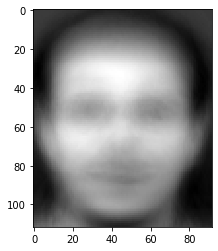

Mean face of data set


In [11]:
Mean_data = np.mean(All_Images_Vector, axis=0)

print("image of size:" , Mean_data.shape)
plt.imshow(Mean_data, interpolation='nearest', cmap='gray')
plt.show()
print("Mean face of data set")

# Compute Quasi-Covariance for the training set
## this will result in a 160 x 160 matrix because there are 4 images per participant and 40 participants

### Quasi-Covariance is computed as: Data^Transpose * Data
### This matrix shares eigenvectors and eigenvalueswith  the actual covariance matrix: Data * Data^Transpose

In [12]:
# Quasi Covariance for data sets
Testing_data_flat_mean_centered_transpose = Testing_data_flat_mean_centered.T
Training_data_flat_mean_centered_transpose = Training_data_flat_mean_centered.T
Gallery_data_flat_mean_centered_transpose = Gallery_data_flat_mean_centered.T

Testing_Quasi_Covariance_Matrix = np.matmul( Testing_data_flat_mean_centered_transpose , Testing_data_flat_mean_centered   )
Training_Quasi_Covariance_Matrix = np.matmul( Training_data_flat_mean_centered , Training_data_flat_mean_centered_transpose   )
Gallery_Quasi_Covariance_Matrix = np.matmul( Gallery_data_flat_mean_centered , Gallery_data_flat_mean_centered_transpose   )

(160, 160)


# Get Eigenvalues and Eigenvectors of Covariance 

In [14]:
Training_eigenvalues , Training_eigenvectors  = np.linalg.eig(Training_Quasi_Covariance_Matrix)

# HEY JUST SO YOU KNOW YOUR EIGEN VALUES AND VECTORS SHOULD BE REAL NUMBERS NOT COMPLEX
print(type(Training_eigenvectors[0][0]))
print(type(Training_eigenvalues[0]))

<class 'numpy.float64'>
<class 'numpy.float64'>


#   Sorting the Eigenvalues and Eigenvectors of the Covariance

##  Sort the Eigenvalues from greatest to least.
##  Be sure to store how the elements moved from the original eigenvalue list to the sorted one.
### This means store the indices of each of the eigenvalues from the original list along with their indices in the sorted list.

In [15]:
# Sort the eigenvalues : Training_eigenvalues
Training_eigenvalues_sort_indexes  = np.argsort(Training_eigenvalues)
Training_eigenvalues_sort          = np.sort(Training_eigenvalues) # HEY WATCH OUT HERE ARE THE EIGENVALUES SORTED LEAST TO GREATEST OR GREATEST TO LEAST

#make the sort descending aka GREATEST TO LEAST
Training_eigenvalues_sort_indexes_descending = Training_eigenvalues_sort_indexes[::-1]
Training_eigenvalues_sort_descending = Training_eigenvalues_sort[::-1]
# print(Training_eigenvalues_sort_indexes)

# Sort the eigenvectors : Training_eigenvectors
Training_eigenvectors_sort = np.zeros((160 , 160) , dtype = float)
for x in range(0,160):
    Training_eigenvectors_sort[:][x] = Training_eigenvectors[Training_eigenvalues_sort_indexes_descending[:]][x] # this must be the descending one!



# Reconstructing the Correct Eigenvectors

### time to reconstruct the Eigenvalues and Eigenvectors (in order) of the actual Covariance Matrix. This is simple to do.
### Using your matrix of Mean-Centered Training images, compute the following:
### E = T * Q
### Where T is the matrix of Mean-Centered Training Images, Q is the matrix of ORDERED Eigenvectors of the Quasi-Covariance Matrix and E is the matrix of ORDERED Eigenvectors of the Correct Covariance Matrix.
### Your E matrix should now be 112*92 x 160. These are the eigenvectors of the true Covariance matrix in the correct order!

In [16]:
# E_matrix = T_matrix * Q_matrix
T_matrix = np.swapaxes(Training_data_flat_mean_centered,0,1) #need to switch the dimensions here 
#print(T_matrix.shape)
Q_matrix = Training_eigenvectors_sort
#print(Q_matrix.shape)
E_matrix = np.dot( T_matrix , Q_matrix )
#print(E_matrix.shape)

(10304, 160)
(160, 160)
(10304, 160)


#   Making Pictures of the Eigenfaces
### Each of these reconstructed Eigenvectors contains the floating point versions of the pixel values (0.00 – 255.00) of what is often called the “Eigenfaces” of the training dataset.
### Essentially, these are the features and elements that when linearly combined in a unique way, will give you a representation of an image.



In [17]:
E_matrix_alt = np.swapaxes(  E_matrix  , 0 , 1 )

#first 5 "most useful" eigenfaces sorted by descending eigenvalues
image1 = E_matrix_alt[0].reshape((112, 92))
image2 = E_matrix_alt[1].reshape((112, 92))
image3 = E_matrix_alt[2].reshape((112, 92))
image4 = E_matrix_alt[3].reshape((112, 92))
image5 = E_matrix_alt[4].reshape((112, 92))

#last 5 "least useful" eigenfaces sorted by eigenvalues
image1m = E_matrix_alt[-1].reshape((112, 92))
image2m = E_matrix_alt[-2].reshape((112, 92))
image3m = E_matrix_alt[-3].reshape((112, 92))
image4m = E_matrix_alt[-4].reshape((112, 92))
image5m = E_matrix_alt[-5].reshape((112, 92))


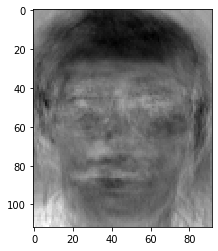

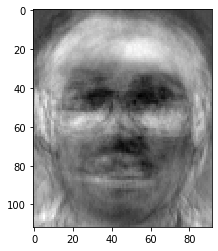

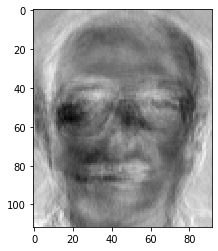

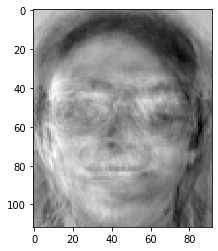

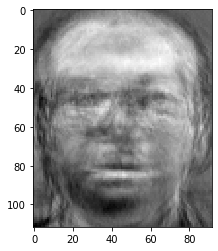

In [18]:
#plot first 5 faces
plt.imshow(image1, interpolation='nearest', cmap='gray')
plt.show()
plt.imshow(image2, interpolation='nearest', cmap='gray')
plt.show()
plt.imshow(image3, interpolation='nearest', cmap='gray')
plt.show()
plt.imshow(image4, interpolation='nearest', cmap='gray')
plt.show()
plt.imshow(image5, interpolation='nearest', cmap='gray')
plt.show()



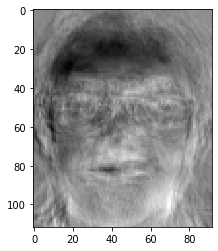

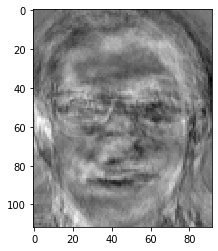

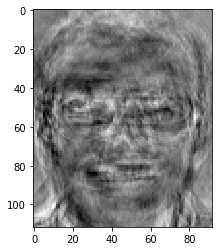

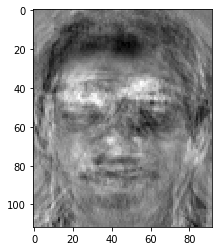

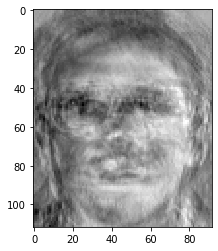

In [19]:
#plot last 5 faces
plt.imshow(image1m, interpolation='nearest', cmap='gray')
plt.show()
plt.imshow(image2m, interpolation='nearest', cmap='gray')
plt.show()
plt.imshow(image3m, interpolation='nearest', cmap='gray')
plt.show()
plt.imshow(image4m, interpolation='nearest', cmap='gray')
plt.show()
plt.imshow(image5m, interpolation='nearest', cmap='gray')
plt.show()


# Make basis set

## the Eigenvalues tell you how much of each “Eigenface” goes into creating an approximation of an image
## Make a new Basis Set matrix out of the First 50 columns of your matrix of Eigenvectors of the correct Covariance matrix.

In [20]:
# take first 50
Basis_set = E_matrix_alt[0:50][:]
#print(Basis_set.shape)

(50, 10304)


# Preparing the Data for Comparison
## Now we need to transform our Gallery and Testing images into representations based on the Basis Set we constructed. This is called “Projecting Images into PCA Space”.
### The terms “Space” and “Basis Set” come from Linear Algebra. A “Basis Set” can be used to “Span” a “Space” meaning that any vector in that “Space” is actually a linear combination of the columns of the “Basis Set”.
### A “Projection” can be thought of as a representation of another vector in a different “Space”. The Projection is done using the Basis Set.
### This computation is actually a weighted sum FOR each of the vectorized images in your Testing and Gallery Sets
### This computation looks like this:
### PCT * Image_Vector * PC
### This procedure is done for each of the principal components and the resulting vectors are then added up to give you a final approximation of your original image

In [22]:
projected_images_testing = np.zeros((80,10304), dtype = float)
projected_images_gallery = np.zeros((160,10304), dtype = float)

for i in range(0,160): # iterate over gallery images  and over testing
    for j in range(0,50):
        #use the mean centered data sets here 
        projected_images_gallery[i][:] += np.dot( np.dot( Basis_set[j].T , Gallery_data_flat_mean_centered[i] ), Basis_set[j]  )
        if (i < 80):
            projected_images_testing[i][:] += np.dot( np.dot( Basis_set[j].T , Testing_data_flat_mean_centered[i] ), Basis_set[j] )


# Preparing the Data for Comparison pt 2
## now we have the two new matrices which are the same size as your Testing and Gallery Sets. These are the projected images in PCA space

## Now we need those “Weights” discussed earlier . They are unique to each of the images in Testing and Gallery Sets.

### In PCA terms, they are usually called PCA “Loadings” and they represent how much of each PC is needed to build up an approximation of each of your unique images in the Gallery and Testing dataset.

### There are 50 of these for each image in your datasets.

## We will need these in order to do the comparison.

## THIS IS ALSO KNOWN AS PCA LOADINGS ... JUST SO YOU KNOW & AVOID FUTURE CONFUSION

In [24]:
# Compute the following FOR each image in each of your datasets.
'''
Weights = zeros(N, 50); // N is the # of images in your dataset 
FOR J in PCs
    Weights[I,J] = PC[J].T * Original_Image
'''
weights_gallery = np.zeros((160,50), dtype = float)
weights_testing = np.zeros((80,50), dtype = float)

#start with the calculation of weights for the gallery
#for pc score in range pcs
for i in range(0,160):
    for j in range(0,50):
        weights_gallery[i][j] = np.dot( Basis_set[j].T  , Gallery_data_flat_mean_centered[i] ) 

for i in range(0,80):
    for j in range(0,50):
        weights_testing[i][j] = np.dot( Basis_set[j].T  , Testing_data_flat_mean_centered[i] ) 



# Now lets compare the images in the gallery and testing datasets

## we are going to use mahalanobis distance
## The result of this computation will be a matrix of distances where each row corresponds to a row in the Testing Matrix and each Column corresponds to a row in the Gallery matrix. Each element will then be a measure of how similar or different each testing image is from each gallery image.

### The resulting matrix will be NxM where N is the number of images in the Testing Set and M is the number of images in the gallery set.
###  Every TWO rows corresponds to one individual and every FOUR columns corresponds to one individual.
### For each row in the distance matrix, determine which individual that row represents. Then find the smallest distance in that row and determine which column it matches up with. Determine which individual is represented by that column.
### Correct matches are found when the individual the row represents is the same as the individual the column of the smallest distance represents.


In [25]:

#FOR I in number of test images
#    FOR J in number of gallery images
#       FOR K in number of PCs in Basis Set
#            d(I,J)+=(1/λ(K))*(projected_images_testing(I,K)-projected_images_gallery(J,K))^2

# Note : lambda(K) is the Eigenvalue of the Kth Basis Set Vector: aka Basis_set[K]

#  N is the number of images in the Testing Set and 
#  M is the number of images in the gallery set
#  K is the number of pc scores in basis set
N = 80
M = 160
K = 50

Comparison_matrix = np.zeros((N,M), dtype = float) # 
for i in range(0,N): # for each test image
    for j in range(0,M): # for each gallery image
        for k in range(0, K): # for each element in the basis set 
            Comparison_matrix[i,j] += (1 /  Training_eigenvalues_sort_descending[k]) * np.square(weights_testing[i,k] - weights_gallery[j,k]) 



In [26]:
gallery_matches = np.zeros(80)

for it in range(0, 80):# this loop organizes the predictions into an array
    gallery_matches[it] = np.argmin(Comparison_matrix[it, :])

print(gallery_matches) #these values should come out generally ascending from 0 -> 159 with some errors and in pairs


[ 29.   0.   5.   5.  10.  11.  14.  14.  16.  16.  20.  20.  26.  26.
  28.  28.  34.  33.  37.  37.  43. 104.  45.  44.  51.  51.  52.  52.
  57.  59.  41.  60. 143. 142.  70.  70.  75.  75.  79.  79.  82.  81.
  85.  86.  91.  89.  92.  93.  99.  99. 100.  51. 107. 107. 147. 110.
 115. 113. 119. 117. 122. 123.   0. 125. 128. 131. 133. 133.  59. 137.
  27.  65. 146. 145.  90. 149.  85. 154. 157.  10.]


In [29]:
#Here we check how well we have used the training data to classify the gallery data in respect to the testing data set
test_ID = np.zeros(80)
gallery_ID = np.zeros(160)
ID = 1
for i in range(0, 80, 2):
    test_ID[i]   = ID
    test_ID[i+1] = ID
    ID = ID + 1

ID = 1
for i in range(0, 160, 4):
    gallery_ID[i]     = ID
    gallery_ID[i + 1] = ID
    gallery_ID[i + 2] = ID
    gallery_ID[i + 3] = ID
    ID = ID + 1

num_correct = 0
num_wrong = 0
for i in range(0, 80):

    if test_ID[i] == gallery_ID[int(gallery_matches[i])]:
        num_correct += 1
    else:
        num_wrong += 1 

accuracy = num_correct / 80

#print(test_ID[1])
#print(gallery_ID[int(gallery_matches[1])])
print("accuracy of PCA of dataset:" , 100*accuracy , "%")



accuracy of PCA of dataset: 82.5 %
